In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
import yfinance as yf
import datetime as dt

stock = "AAPL"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 7, 13)

df =yf.download(stock, start, end)

/var/folders/r_/ph8qdjl51_5736v8kyp0p6v80000gn/T/ipykernel_40587/3068160907.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df =yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.841047,0.845274,0.764033,0.787983,535796800
2000-01-04,0.770139,0.831186,0.760277,0.813342,512377600
2000-01-05,0.781408,0.830716,0.773895,0.779530,778321600
2000-01-06,0.713787,0.803950,0.713787,0.797376,767972800
2000-01-07,0.747598,0.758868,0.717544,0.725057,460734400


In [11]:
df.shape

(6419, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6419 entries, 2000-01-03 to 2025-07-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6419 non-null   float64
 1   (High, AAPL)    6419 non-null   float64
 2   (Low, AAPL)     6419 non-null   float64
 3   (Open, AAPL)    6419 non-null   float64
 4   (Volume, AAPL)  6419 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 300.9 KB


In [13]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [14]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,6419.000000,6419.000000,6419.000000,6419.000000,6.419000e+03
mean,44.733334,45.184422,44.236172,44.695597,3.792713e+08
std,64.413878,65.050211,63.697837,64.342420,3.826493e+08
min,0.197156,0.198208,0.191145,0.195202,2.323470e+07
25%,2.061116,2.100337,2.029109,2.070583,1.104746e+08
50%,15.098275,15.227856,14.949021,15.115668,2.591792e+08
75%,47.826569,48.175233,47.402215,47.726371,5.084786e+08
max,258.396667,259.474086,257.010028,257.568678,7.421641e+09


In [15]:
df = df.reset_index()

In [16]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2000-01-03,0.841047,0.845274,0.764033,0.787983,535796800
1,2000-01-04,0.770139,0.831186,0.760277,0.813342,512377600
2,2000-01-05,0.781408,0.830716,0.773895,0.779530,778321600
3,2000-01-06,0.713787,0.803950,0.713787,0.797376,767972800
4,2000-01-07,0.747598,0.758868,0.717544,0.725057,460734400


In [17]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [18]:
df.to_csv("aapl.csv")

In [19]:
data01 = pd.read_csv("aapl.csv")

In [20]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,0,2000-01-03,0.8410474061965942,0.8452735457047567,0.7640334671868583,0.7879830623771998,535796800
2,1,2000-01-04,0.7701389789581299,0.8311859925057475,0.7602772473897574,0.8133416112650513,512377600
3,2,2000-01-05,0.7814084887504578,0.8307163398899913,0.7738954220935865,0.779530209546656,778321600
4,3,2000-01-06,0.713786780834198,0.8039495127008364,0.713786780834198,0.7973755595969272,767972800


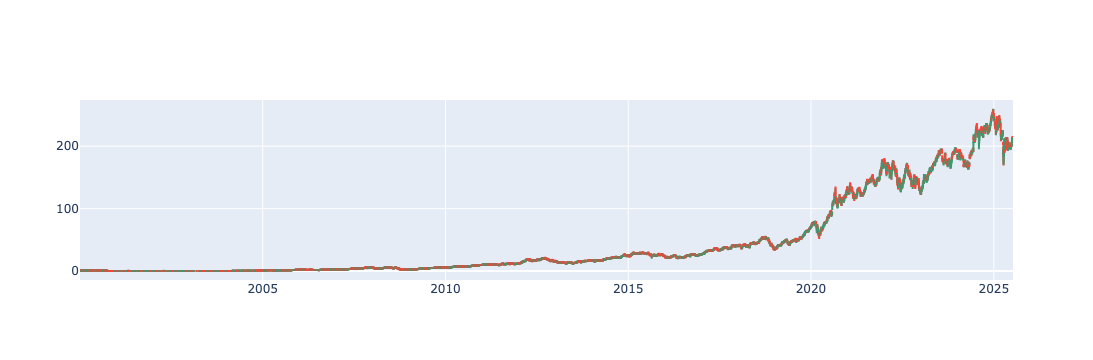

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                     high = data01['High'],
                                     low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [28]:
#df = df.drop(['Date'], axis = 1)

In [29]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,0.841047,0.845274,0.764033,0.787983,535796800
1,0.770139,0.831186,0.760277,0.813342,512377600
2,0.781408,0.830716,0.773895,0.779530,778321600
3,0.713787,0.803950,0.713787,0.797376,767972800
4,0.747598,0.758868,0.717544,0.725057,460734400


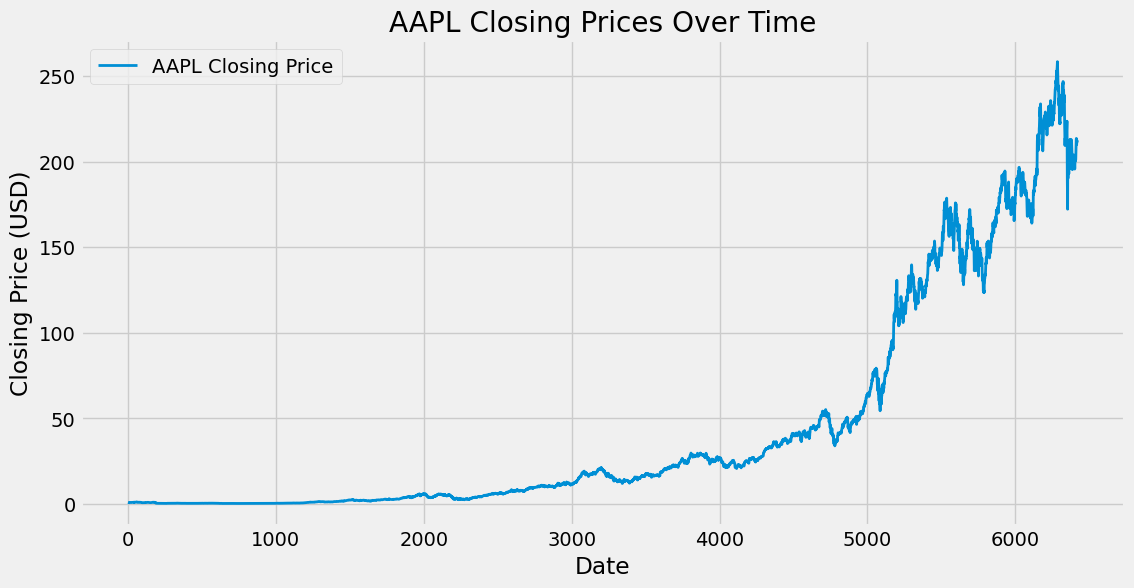

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

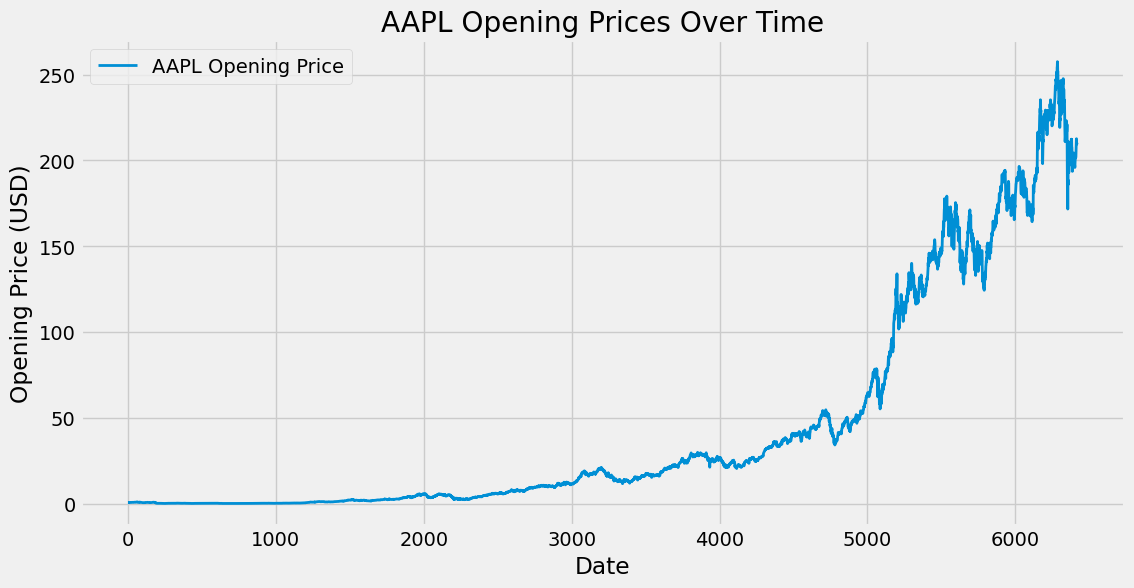

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.show()

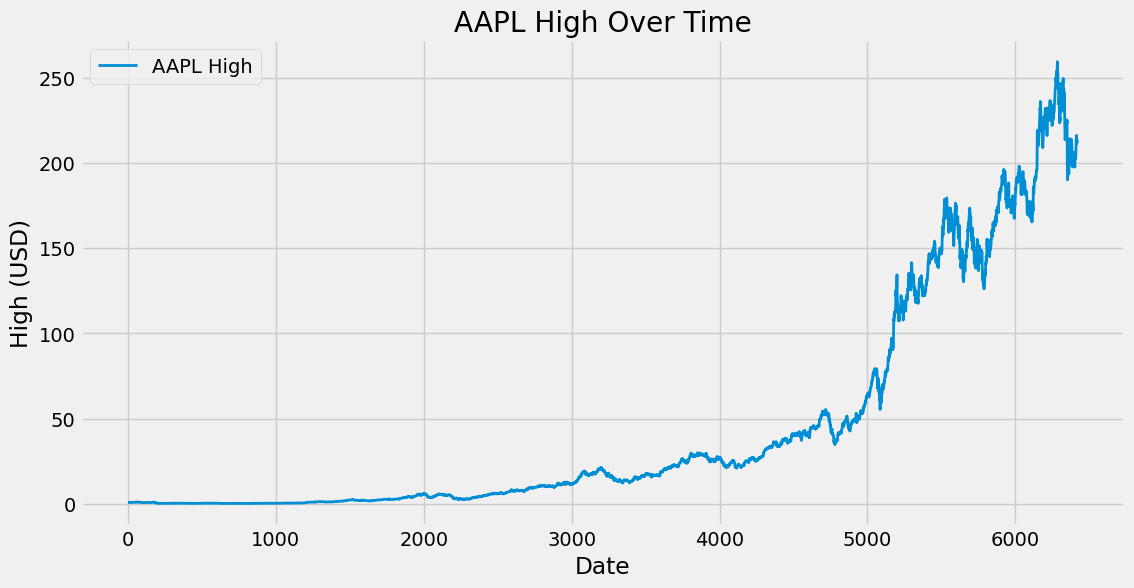

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High', linewidth = 2)
plt.title(f'{stock} High Over Time')
plt.xlabel('Date')
plt.ylabel('High (USD)')
plt.legend()
plt.show()

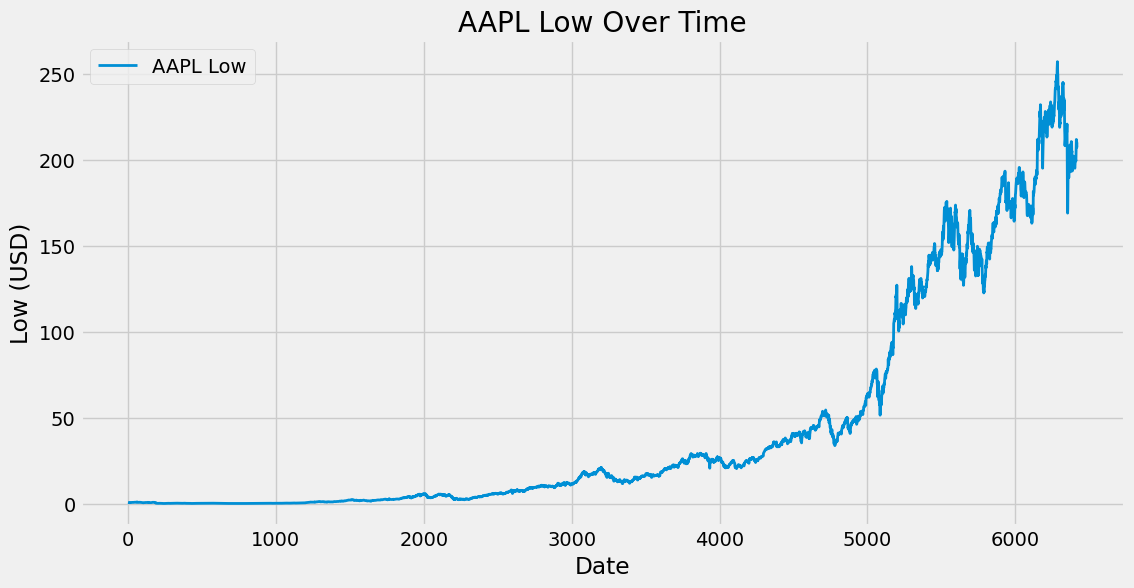

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], label = f'{stock} Low', linewidth = 2)
plt.title(f'{stock} Low Over Time')
plt.xlabel('Date')
plt.ylabel('Low (USD)')
plt.legend()
plt.show()

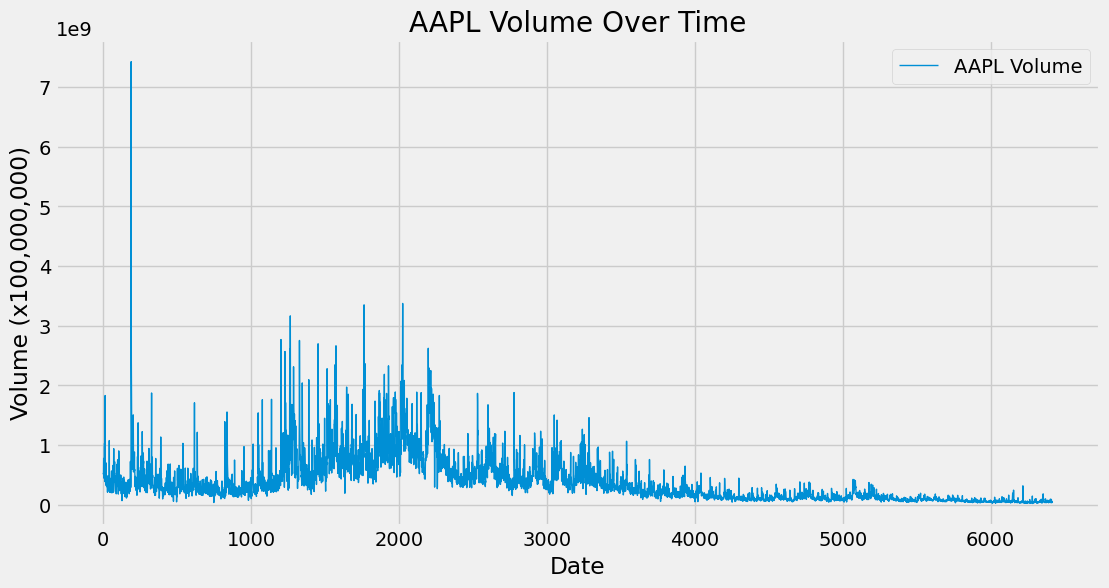

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (x100,000,000)')
plt.legend()
plt.show()

In [35]:
ma100 = df.Close.rolling(100).mean()

In [36]:
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6414,211.737625
6415,211.514571
6416,211.260374
6417,210.972337


In [37]:
ma200 = df.Close.rolling(200).mean()

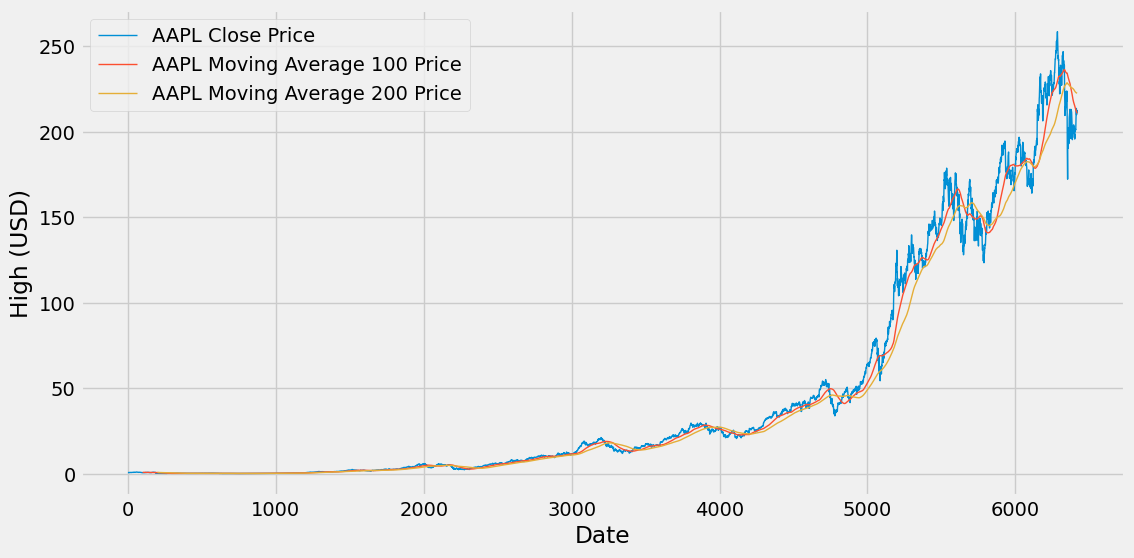

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('High (USD)')
plt.legend()
plt.show()

In [39]:
ema100 = df.Close.ewm(span = 100, adjust = False).mean()

In [40]:
ema200 = df.Close.ewm(span = 200, adjust = False).mean()

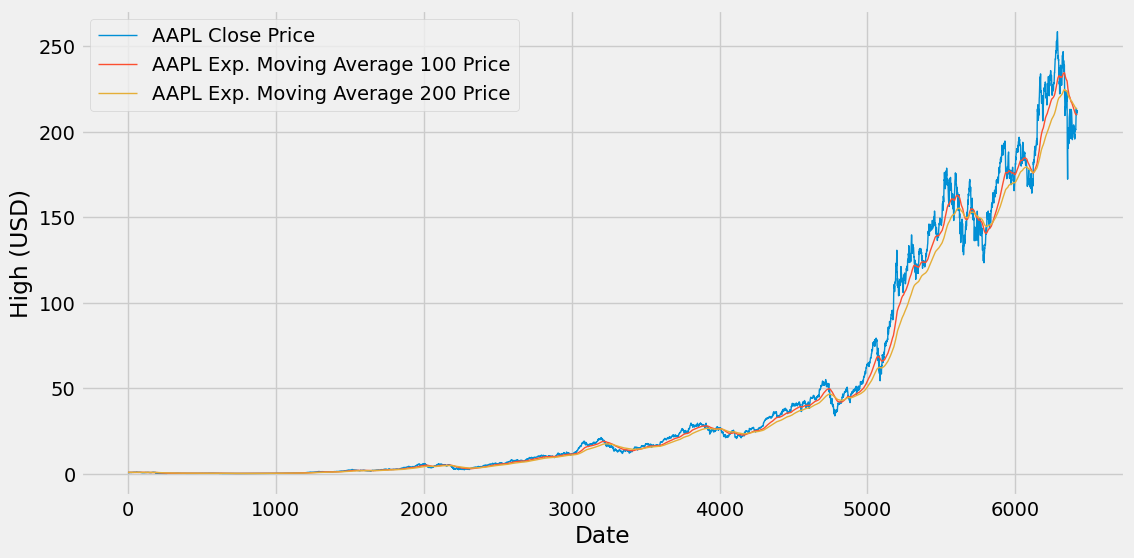

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.xlabel('Date')
plt.ylabel('High (USD)')
plt.legend()
plt.show()

In [42]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [43]:
data_training.shape

(4493, 1)

In [44]:
data_testing.shape

(1926, 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [48]:
data_training_array = scaler.fit_transform(data_training)

In [49]:
data_training_array

array([[0.01569872],
       [0.0139699 ],
       [0.01424466],
       ...,
       [0.98865419],
       [0.99184727],
       [1.        ]])

In [50]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
x_train.shape

(4393, 100, 1)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input

In [56]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0282
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0034
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0034
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0027
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0027
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0030
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0024
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0026
Epoch 9/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0028
Epoch 10/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0026
Epoch 11/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0023
Epoch 12/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0020
Epoch 13/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0021
Epoch 14/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0021
Epoch 15/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 7s

In [59]:
past_100_days = data_training.tail(100)

In [64]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [65]:
final_df.head()

Ticker,AAPL
0,33.777119
1,33.977440
2,33.921532
3,34.072933
4,33.965786


In [67]:
input_data = scaler.fit_transform(final_df)

In [68]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [69]:
x_test.shape

(1926, 100, 1)

In [70]:
y_predicted = model.predict(x_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


In [71]:
y_predicted.shape

(1926, 1)

In [73]:
scaler.scale_

array([0.00444147])

In [74]:
scaler_factor = 1/0.00444147
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

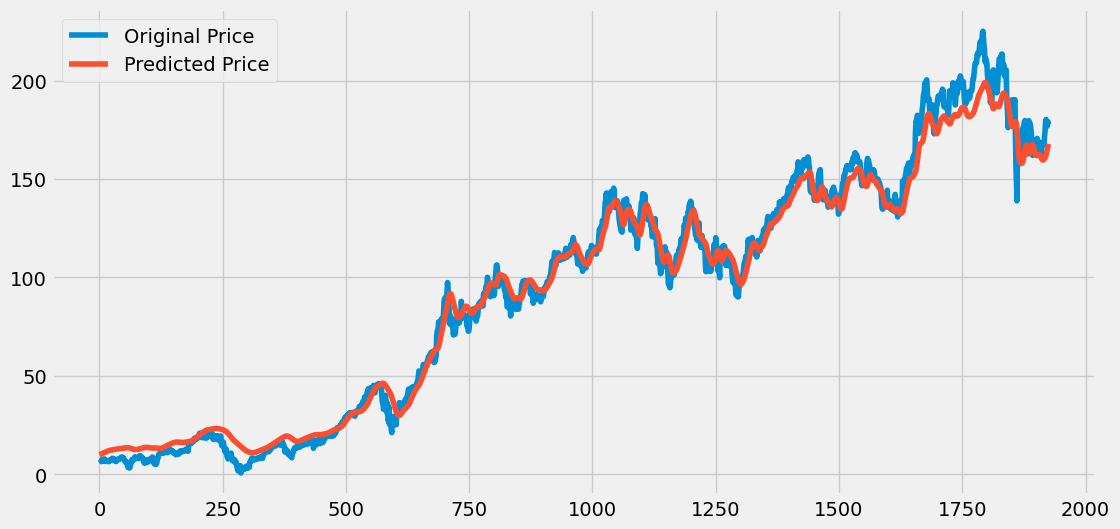

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price')
plt.plot(y_predicted, label = 'Predicted Price')
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')